In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch import nn
%matplotlib inline

In [ ]:
x = torch.unsqueeze(torch.linspace(0, 5, 100), dim=1) 

y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

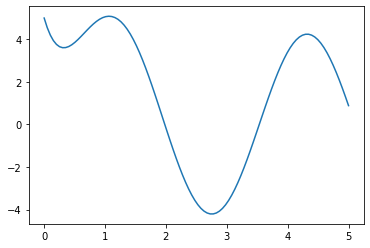

In [ ]:
plt.plot(x,y)

In [ ]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1- sigmoid(x))

def neural_network(x,weights,bias):
    s_z = sigmoid(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z, weights[1]) + bias[1]

def dN_dx(weights, x):
    s_z_grad = sigmoid_grad(torch.matmul(x,weights[0])+bias[0]) #100x10
    mul=torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [ ]:
def error(pred,target): return ((pred-target)**2).mean() 

In [ ]:
#initialize weights and biases
weights = [torch.randn((1,10),  requires_grad=True), torch.randn((10,1),  requires_grad=True)]
bias = [torch.randn(10,  requires_grad=True), torch.randn(1,  requires_grad=True)]
params = list(weights) + list(bias)

In [ ]:
optimizer = torch.optim.Adam(params, lr=0.01)

In [ ]:
epochs=5
lr=0.1
for i in range(epochs):
    pred = neural_network(x,weights,bias)
    loss = error(pred,y)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()  
    print("Loss: ", loss.item())

Loss:  0.00026103819254785776
Loss:  0.00026084930868819356
Loss:  0.0002606782072689384
Loss:  0.0002605502668302506
Loss:  0.0002604296896606684


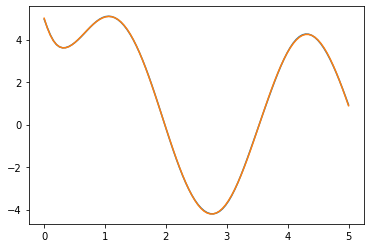

In [ ]:
N=neural_network(x,weights,bias)
plt.plot(x.data.numpy(), N.data.numpy())
plt.plot(x,y)

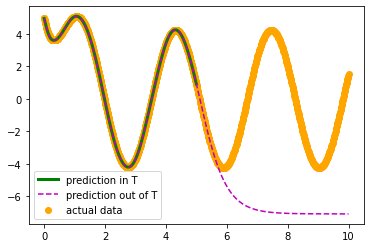

In [ ]:
#predictions
x = torch.unsqueeze(torch.linspace(0, 5, 800), dim=1) 

y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)
N = neural_network(x, weights,bias)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), N.data.numpy(), 'g-', lw=3, label ='prediction in T')
x = torch.unsqueeze(torch.linspace(0, 10, 800), dim=1) #OUT OF T
N = neural_network(x, weights,bias)
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange", label ='actual data')

ax.plot(x.data.numpy(), N.data.numpy(), 'm--', label ='prediction out of T')
plt.legend()

In [ ]:
#second approach

In [ ]:
net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )

In [ ]:
def loss(x):

    x.requires_grad = True
    N = neural_network(x, weights, bias)
    dNx_dx = dN_dx(weights, x)
    return  torch.mean( ( dNx_dx - net1(x)*N )  ** 2)

In [ ]:
optimizer = torch.optim.Adam(net1.parameters(), lr=0.01)

In [ ]:
x = torch.unsqueeze(torch.linspace(0, 6, 4000), dim=1)  #train net1 in (-3, 4)

In [ ]:
def closure():
    
    l = loss(x)
    #losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(4):
    optimizer.step(closure)


loss: 1.5948443412780762
loss: 1.5948281288146973
loss: 1.5948121547698975
loss: 1.5947959423065186


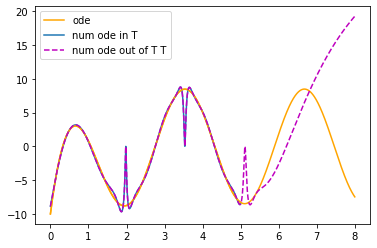

In [ ]:
#check if cos is the same with O.D.E
x = torch.unsqueeze(torch.linspace(0,5, 2000), dim=1) 
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

dy = 12*torch.sin(2*x)-2*y

method_dy = net1(x)* neural_network(x,weights,bias)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(),'orange', label='ode')
plt.plot(x.data.numpy(), method_dy, label='num ode in T')

x = torch.unsqueeze(torch.linspace(0,8, 2000), dim=1) 
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

dy = 12*torch.sin(2*x)-2*y

method_dy = net1(x)* neural_network(x,weights,bias)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(), 'orange')
plt.plot(x.data.numpy(), method_dy, 'm--', label='num ode out of T T')

plt.legend()
plt.show()

**Train two networks for ODE.**

In [ ]:
#train n2 for ode:
n2 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )


In [ ]:
def loss(x):

    x.requires_grad = True
    N = neural_network(x, weights, bias)
    dNx_dx = dN_dx(weights, x)

    return  torch.mean( ( dNx_dx - net1(x)*N - n2(x) )  ** 2)

optimizer = torch.optim.Adam(n2.parameters(), lr=0.001)

In [ ]:
x = torch.unsqueeze(torch.linspace(0, 7, 2000), dim=1)  #train net1 in (-3, 4)

In [ ]:
def closure():
    
    l = loss(x)
    #losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(5):
    optimizer.step(closure)

loss: 0.8222765922546387
loss: 0.8222693204879761
loss: 0.8222619295120239
loss: 0.8222546577453613
loss: 0.8222473859786987


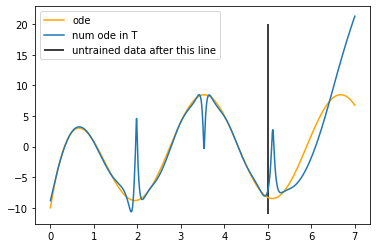

In [ ]:
#check if cos is the same with O.D.E
x = torch.unsqueeze(torch.linspace(0,7, 2000), dim=1) 
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

dy = 12*torch.sin(2*x)-2*y

method_dy = net1(x)* neural_network(x,weights,bias) - n2(x)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(),'orange', label='ode')
plt.plot(x.data.numpy(), method_dy, label='num ode in T')
plt.vlines(x=5, ymin=-11, ymax=20, color='black', label='untrained data after this line')


plt.legend()
plt.show()

In [ ]:
#solution of ODE 

In [ ]:
x = torch.Tensor(np.linspace(0, 7, 2000)[:, None]) 

In [ ]:
NN = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1))
A = neural_network(x[0],weights,bias)
Psi_t = lambda x: A + x*NN(x) #NN is responsible for the solution of O.D.E
f = lambda x: net1(x)*neural_network(x,weights,bias) - n2(x) #they are both trained. 

In [ ]:
def loss_fun(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x) )  ** 2)

In [ ]:
optimizer = torch.optim.Adam(NN.parameters(), lr=0.01)

In [ ]:
def closure():

    optimizer.zero_grad()
    l = loss_fun(x)
    print(l)
    #l.backward()
    l.backward(retain_graph=True)
    return l

for i in range(5):
    optimizer.step(closure)

tensor(2.2715, grad_fn=<MeanBackward0>)
tensor(2.2714, grad_fn=<MeanBackward0>)
tensor(2.2713, grad_fn=<MeanBackward0>)
tensor(2.2712, grad_fn=<MeanBackward0>)
tensor(2.2711, grad_fn=<MeanBackward0>)


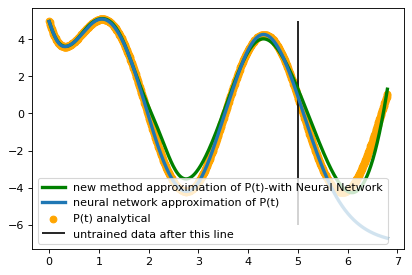

In [ ]:
x = torch.unsqueeze(torch.linspace(0,6.8, 800), dim=1) 
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)
p_t_second = Psi_t(x)
p_t_first = neural_network(x,weights,bias)
fig, ax = plt.subplots(dpi=80)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange", label ='P(t) analytical')

ax.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', lw=3, label ='new method approximation of P(t)-with Neural Network')
ax.plot(x.data.numpy(), p_t_first.data.numpy(), lw=3, label ='neural network approximation of P(t)')
ax.vlines(x=5, ymin=-6, ymax=5, color='black', label='untrained data after this line')


#ax.plot(x.data.numpy(), yrk, lw=3, label ='RK approximation of P(t)')

plt.legend(loc='best');

In [ ]:
#RK METHOD FOR THE SOLUTION

In [ ]:
x = torch.unsqueeze(torch.linspace(0,7, 2000), dim=1) 
N = len(x)
h = (7-0)/N

y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)

In [ ]:
yrk = np.zeros(int(N))
yrk[0]=neural_network(x[0],weights,bias)
for i in range(0,int(N-1)):
    k1 = net1(x[i])*neural_network(x[i],weights,bias)
    k2 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2),weights,bias)
    k3 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2),weights,bias)
    k4 = net1(x[i]+h)*neural_network(x[i]+h,weights,bias)

    yrk[i+1] = yrk[i] + (1/6)*h*(k1+2*k2+2*k3+k4)

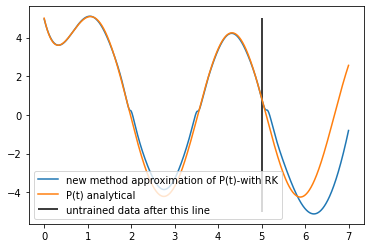

In [ ]:
plt.plot(x,yrk, label ='new method approximation of P(t)-with RK')
plt.plot(x,y, label ='P(t) analytical')
plt.vlines(x=5, ymin=-5, ymax=5, color='black', label='untrained data after this line')
plt.legend()
plt.show()

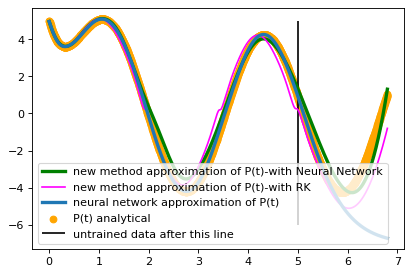

In [ ]:
#together
x = torch.unsqueeze(torch.linspace(0, 6.8, 2000), dim=1) 
y = -3*torch.cos(2*x)+3*torch.sin(2*x)+8*torch.exp(-2*x)  
p_t_second = Psi_t(x)
p_t_first = neural_network(x,weights,bias)
fig, ax = plt.subplots(dpi=80)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange", label='P(t) analytical')
ax.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', lw=3, label ='new method approximation of P(t)-with Neural Network')
ax.plot(x.data.numpy(), yrk,color='magenta', label ='new method approximation of P(t)-with RK')

ax.plot(x.data.numpy(), p_t_first.data.numpy(), lw=3, label ='neural network approximation of P(t)')

ax.vlines(x=5, ymin=-6, ymax=5, color='black', label='untrained data after this line')

plt.legend(loc='best');